# Krypton XY Lifetime maps

## SM: Single Map (in time). 

### Author: GML, JAH, JJGC

### Software: KrCalib : https://github.com/nextic/KrCalib/

In [104]:
%load_ext autoreload
%autoreload 2
import os
import sys
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Last updated on  Tue Oct  9 00:08:09 2018


### Logger

In [2]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')


2018-10-08 23:49:32,086 | INFO : Hello world!


### Input files

In [3]:
from krcal.core.kr_types import KrFileName
input_path  = f"$IC_DATA/dst"
output_path = f"$IC_DATA/ldst"
map_path    = f"$IC_DATA/maps"

input_file_names  = ['dst_6364_trigger1_0000_9720.h5']
output_file_name  = ' '
map_file_name     = 'kr_maps_xy_6364.h5'
map_file_name_ts  = 'kr_maps_xy_ts_6364.h5'
emap_file_name    = ' '


krfn = KrFileName(input_file_names,
                  output_file_name,
                  map_file_name,
                  map_file_name_ts,
                  emap_file_name)

### Notebook configuration

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import tables            as tb
import random
import glob
import warnings
sns.set()

In [6]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [7]:
from krcal.core.io_functions       import kdst_write
from krcal.core.io_functions       import filenames_from_list
from krcal.core.io_functions       import write_maps
from krcal.core.io_functions       import read_maps
from krcal.core.io_functions       import write_maps_ts
from krcal.core.io_functions       import read_maps_ts

In [8]:
from krcal.core.histo_functions    import h1, h1d, h2, h2d, plot_histo

In [9]:
from krcal.core.core_functions      import time_delta_from_time
from krcal.core.core_functions      import phirad_to_deg
from krcal.core.core_functions      import NN
from krcal.core                     import fit_functions_ic as fitf

In [10]:
from krcal.core.stat_functions      import mean_and_std

In [11]:
from krcal.core.analysis_functions  import kr_ranges_and_bins
from krcal.core.analysis_functions  import fiducial_volumes
from krcal.core.analysis_functions  import fid_eff
from krcal.core.analysis_functions  import select_rphi_sectors
from krcal.core.analysis_functions  import select_xy_sectors
from krcal.core.analysis_functions  import event_map
from krcal.core.analysis_functions  import plot_sector
from krcal.core.analysis_functions  import plot_sectors
from krcal.core.analysis_functions  import kr_event_selection
from krcal.core.analysis_functions  import kr_event

In [12]:
from krcal.core.fit_lt_functions    import fit_lifetime
from krcal.core.fit_lt_functions    import plot_fit_lifetime_and_chi2
from krcal.core.fit_lt_functions    import print_fit_lifetime
from krcal.core.fit_lt_functions    import time_fcs
from krcal.core.fit_lt_functions    import fit_fcs_in_sectors
from krcal.core.fit_lt_functions    import fit_fcs_in_xy_bin
from krcal.core.fit_lt_functions    import fit_map
from krcal.core.fit_lt_functions    import fit_map_xy
from krcal.core.fit_lt_functions    import get_time_series

In [13]:
from krcal.core.fit_lt_histograms   import histo_fit_sectors
from krcal.core.fit_lt_histograms   import print_fit_sectors_pars
from krcal.core.fit_lt_histograms   import plot_fit_sectors
from krcal.core.fit_lt_histograms   import plot_fit_xy
from krcal.core.fit_lt_histograms   import plot_time_fcs

In [14]:
from krcal.core.kr_types import PlotLabels, KrEvent, ASectorMap
from krcal.core.kr_types import FitType, KrSector, MapType
from krcal.core.kr_types import KrFileName


In [15]:
from krcal.core.map_functions   import draw_wedges
from krcal.core.map_functions   import define_rphi_sectors
from krcal.core.map_functions   import rphi_sector_alpha_map
from krcal.core.map_functions   import rphi_sector_map
from krcal.core.map_functions   import tsmap_from_fmap
from krcal.core.map_functions   import amap_from_tsmap
from krcal.core.map_functions   import relative_errors
from krcal.core.map_functions   import draw_maps
from krcal.core.map_functions   import amap_valid_mask
from krcal.core.map_functions   import amap_valid_fraction
from krcal.core.map_functions   import draw_xy_maps
from krcal.core.map_functions   import draw_xy_map
from krcal.core.map_functions   import draw_xy_maps_ts
from krcal.core.map_functions   import amap_average
from krcal.core.map_functions   import amap_max
from krcal.core.map_functions   import amap_min
from krcal.core.map_functions   import amap_replace_nan_by_mean
from krcal.core.map_functions   import amap_replace_nan_by_zero
from krcal.core.map_functions   import regularize_maps
from krcal.core.map_functions   import get_maps_from_tsmap
from krcal.core.map_functions   import map_average

In [16]:
import krcal.dev.corrections       as corrections 


In [17]:
from numpy import pi, sqrt

In [18]:
from typing      import List, Tuple, Dict, Sequence, Iterable

In [19]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

### Logger

In [20]:
log = logging.getLogger()

### Input/output 

In [21]:
fn =filenames_from_list(krfn, input_path, output_path, map_path)

In [22]:
fn

KrFileName(input_file_names=['/Users/jjgomezcadenas/Projects/ICDATA/dst/dst_6364_trigger1_0000_9720.h5'], output_file_name='/Users/jjgomezcadenas/Projects/ICDATA/ldst/ ', map_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_6364.h5', map_file_name_ts='/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_maps_xy_ts_6364.h5', emap_file_name='/Users/jjgomezcadenas/Projects/ICDATA/maps/ ')

In [23]:
dst           = load_dsts(fn.input_file_names, "DST", "Events")

In [24]:
unique_events = ~dst.event.duplicated()
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of events: {number_of_evts_full}")

Total number of events: 967098


In [25]:
dst.columns

Index(['index', 'event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w',
       'S1h', 'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT',
       'Z', 'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

### Time differences in seconds

In [26]:
dst_time = dst.sort_values('event')
T       = dst_time.time.values
DT      = time_delta_from_time(T)

### Ranges and binning

In [38]:
RMAX      = 200

s1e_range = (3, 25)
s2e_range = (2000, 14000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range = (5000, 14000)
lt_range = (1000, 6000)
c2_range = (0,5)

krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 50,
                                                        ynbins    = 50,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

In [39]:
kge = kr_event(dst, DT, dst.S2e, dst.S2q)

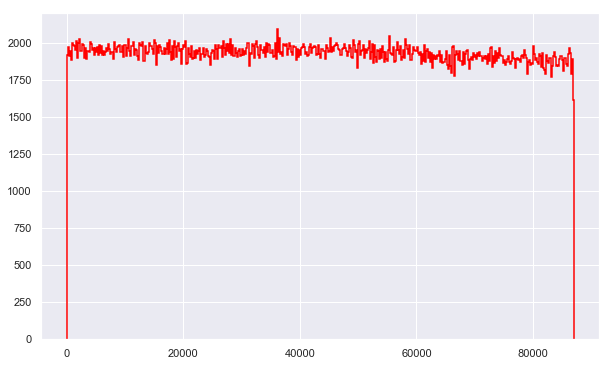

In [40]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(kge.DT, bins=500, range = (kge.DT[0], kge.DT[-1]), color='red', stats=False, lbl='pre-sel')

### Time 

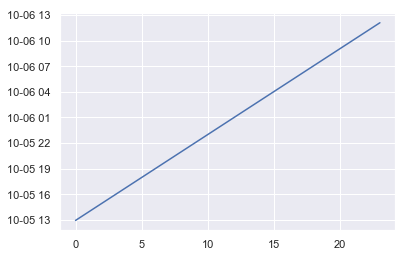

In [30]:
plt.plot(krTimes.timeStamps)

### Event distribution

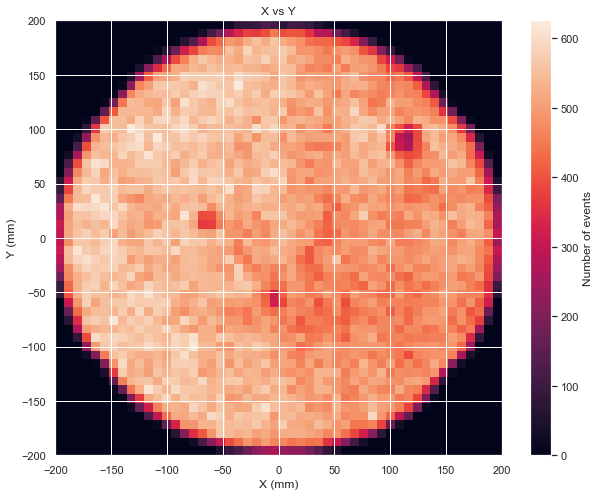

In [41]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, krRanges.X, krRanges.Y, 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

## Time series

In [42]:
log.setLevel(logging.INFO)

### Divide dst in 20 time series

In [107]:
nt = 20
t0 = time.time()

ts, masks = get_time_series(nt, DT[-1], kge)  
t1 = time.time()
print(f' get_time_series: t = {t1 -t0}')

 get_time_series: t = 0.03795194625854492


In [108]:
print(f'tlast = {DT[-1]}')
print(f'ts = {ts}, len(masks) = {len(masks)}' )

tlast = 86987.08800005913
ts = [2174.5, 6523.5, 10872.5, 15221.5, 19570.5, 23919.5, 28268.5, 32617.5, 36966.5, 41315.5, 45664.5, 50013.5, 54362.5, 58711.5, 63060.5, 67409.5, 71758.5, 76107.5, 80456.5, 84805.5, 84809.0], len(masks) = 21


### Fit lifetime of a time series

In [109]:
t0 = time.time()
fps = time_fcs(ts, masks, kge, 
               nbins_z = 15,
               nbins_e = 25,
               range_z = (10, 550),
               range_e = (7000, 14000),
               energy  = 'S2e',
               fit     = FitType.profile)
t1 = time.time()
print(f' time_fcs: t = {t1 -t0}')

 time_fcs: t = 0.2542119026184082


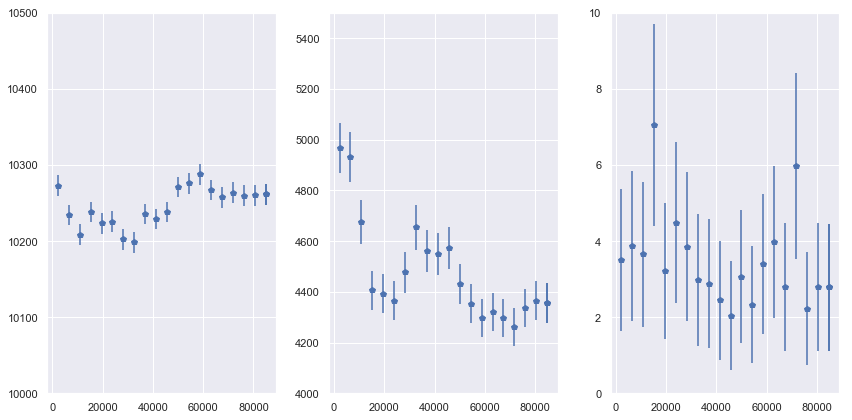

In [110]:
plot_time_fcs(fps,
              range_chi2  = (0,10),
              range_e0    = (10000,10500),
              range_lt    = (4000, 5500),
              figsize     = (12,6))

## Divide chamber in sectors of XY

In [111]:
t0 = time.time()
KRES = select_xy_sectors(dst, DT, dst.S2e.values, dst.S2q.values, krBins.X, krBins.Y)
t1 = time.time()
print(f' KRES: t = {t1 -t0}')

 KRES: t = 9.768301010131836


In [112]:
neM = event_map(KRES)

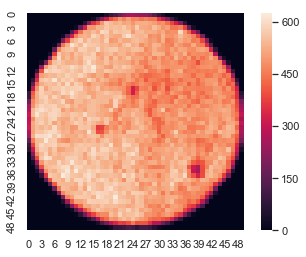

In [113]:
ax = sns.heatmap(neM, square=True)

#### Notice that binning in X-Y does not take advantage of the chamber symmetry which is obviously R-phi. Thus, many bins in the KRES map will be zero. 

## Fits in XY sectors

## Maps

#### fit maps. The object returned is a Dict[int, List[FitParTS]] where

```
@dataclass
class FitParTS:             # Fit parameters Time Series
    ts   : np.array          # contains the time series (integers expressing time differences)
    e0   : np.array          # e0 fitted in time series
    lt   : np.array
    c2   : np.array
    e0u  : np.array          # e0 error fitted in time series
    ltu  : np.arra`
```
Thus, each bin contains 6 time series; ts is time (time difference wrt to the start of the run); e0, lt... are fitted parameters to time slices.

### Single time bin

In [51]:
print(krNbins.Z,krNbins.S2e,z_range, e_range,)

15 25 (10, 550) (5000, 14000)


In [114]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 1,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.unbined,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 5.631825923919678


In [115]:
times = fpmxy[0][0].ts

In [116]:
times

[43493.5]

#### Obtain time maps from fmap: The object returned is a SectorMapTS
```
@dataclass
class SectorMapTS:  # Map in chamber sector containing time series of pars
    chi2  : Dict[int, List[np.array]]
    e0    : Dict[int, List[np.array]]
    lt    : Dict[int, List[np.array]]
    e0u   : Dict[int, List[np.array]]
    ltu   : Dict[int, List[np.array]]
```
Here the dictionary is arranged for each of the relevant variables.

In [117]:
tsm = tsmap_from_fmap(fpmxy)

<ErrorbarContainer object of 3 artists>

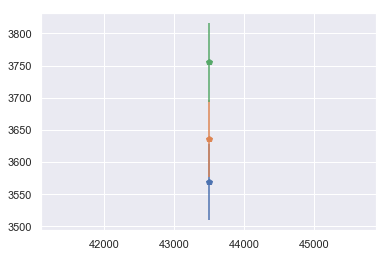

In [118]:
plt.errorbar(times, tsm.lt[25][25], np.sqrt(tsm.lt[25][25]), fmt="p")
plt.errorbar(times, tsm.lt[25][21], np.sqrt(tsm.lt[25][21]), fmt="p")
plt.errorbar(times, tsm.lt[25][22], np.sqrt(tsm.lt[25][22]), fmt="p")

<ErrorbarContainer object of 3 artists>

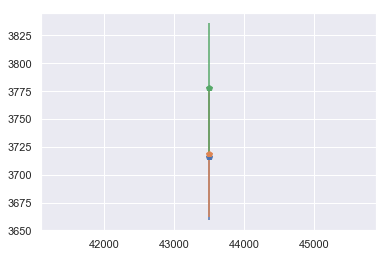

In [59]:
plt.errorbar(times, tsm.lt[15][10], np.sqrt(tsm.lt[6][10]), fmt="p")
plt.errorbar(times, tsm.lt[15][11], np.sqrt(tsm.lt[6][11]), fmt="p")
plt.errorbar(times, tsm.lt[15][12], np.sqrt(tsm.lt[6][12]), fmt="p")

### Obtain amap from tsm: The object returned is ASectorMap
```
@dataclass
class ASectorMap:  # Map in chamber sector containing average of pars
    chi2  : DataFrame
    e0    : DataFrame
    lt    : DataFrame
    e0u   : DataFrame
    ltu   : DataFrame
```
 

#### Example: map in the first time series

In [121]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [122]:
amap_average(am) 

ASectorMap(chi2=0.9370537291069541, e0=10065.78527729882, lt=3503.09400486899, e0u=24.4451372739552, ltu=102.69293040310265)

#### Get rid of outlayers that distort mean and error

In [123]:
rmap = regularize_maps(am, erange=e_range, ltrange=lt_range, debug=True)

 set nans to average value of interval = 9500.0
 set nans to average value of interval = 3500.0


In [124]:
amap_average(rmap)

ASectorMap(chi2=0.9370537291069541, e0=10065.78527729882, lt=3503.09400486899, e0u=24.4451372739552, ltu=102.69293040310265)

In [125]:
asm = relative_errors(rmap)

In [126]:
amap_average(asm)

ASectorMap(chi2=0.9370537291069541, e0=10065.78527729882, lt=3503.09400486899, e0u=0.2567346338961671, ltu=2.953644702281065)

#### Draw the maps using default colormap

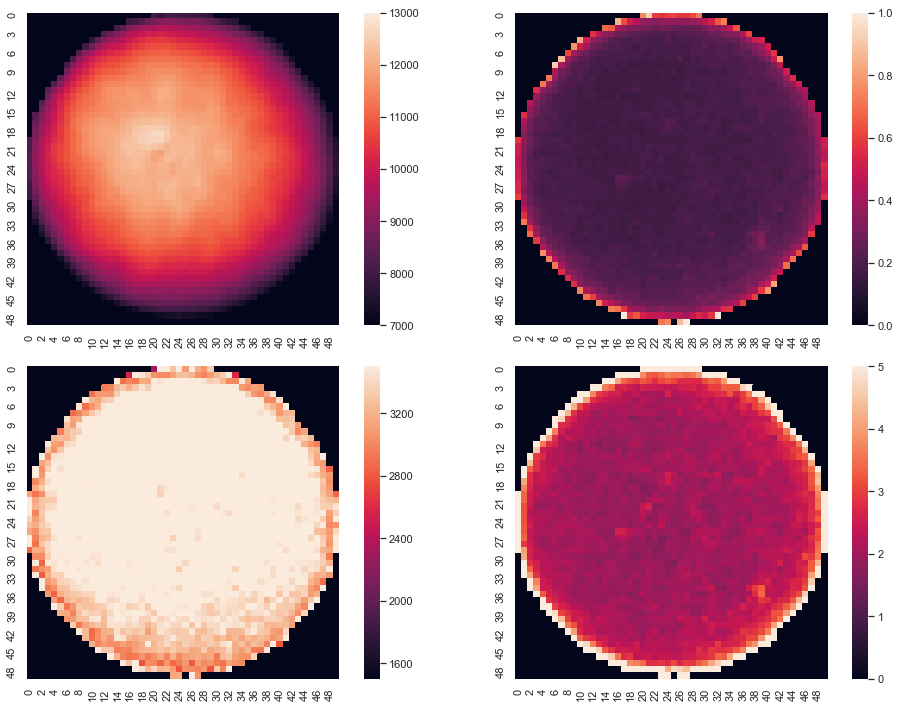

In [127]:
draw_xy_maps(asm,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

In [128]:
asm.lt

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3798.595695,...,3405.638554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3469.675548,2894.894088,...,3090.984019,3789.787846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2879.287803,2992.030121,3121.602361,...,3092.780182,3204.188628,3228.468715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3439.744879,3129.364029,3186.840851,3561.322768,...,3276.837804,3266.680239,3317.361621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,3267.415162,3109.137353,3474.856796,3526.436935,...,3578.793631,3295.295208,3346.926986,3108.565457,NaN,NaN,NaN,NaN,NaN,NaN


#### Binning of 50 x 50 works well. Thinner bining may result in problems. 

### Lifetime rathr uniform in chamber except for low part

In [129]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [130]:
amap_average(asmAv)

ASectorMap(chi2=1.2039034987195272, e0=10258.42910712008, lt=3502.490482686483, e0u=0.2851294916819309, ltu=3.274922463861766)

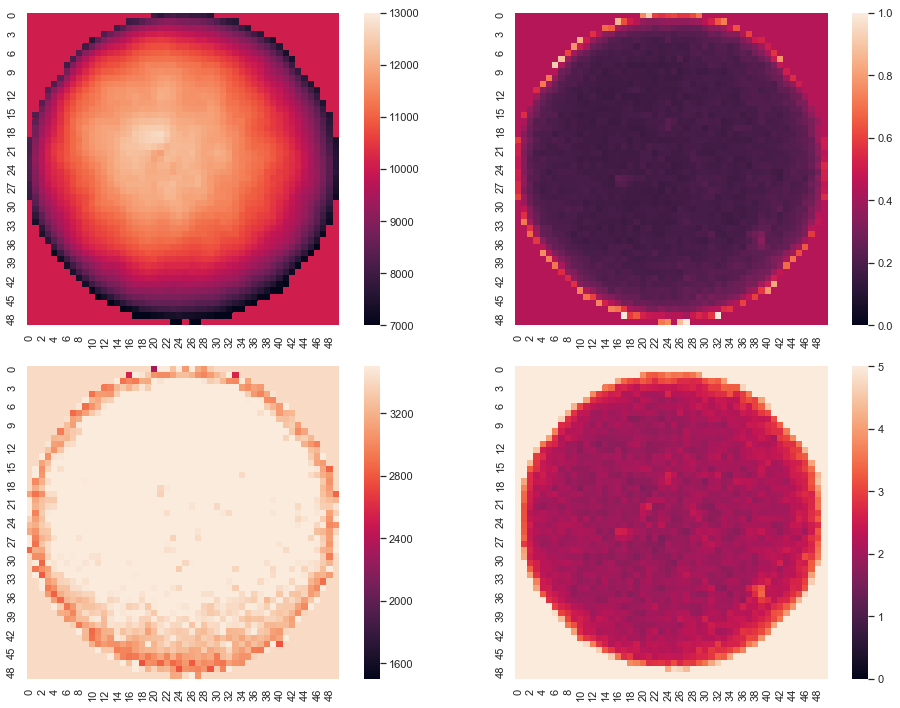

In [131]:
draw_xy_maps(asmAv,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            figsize=(14,10))

### Or using a specific colormap

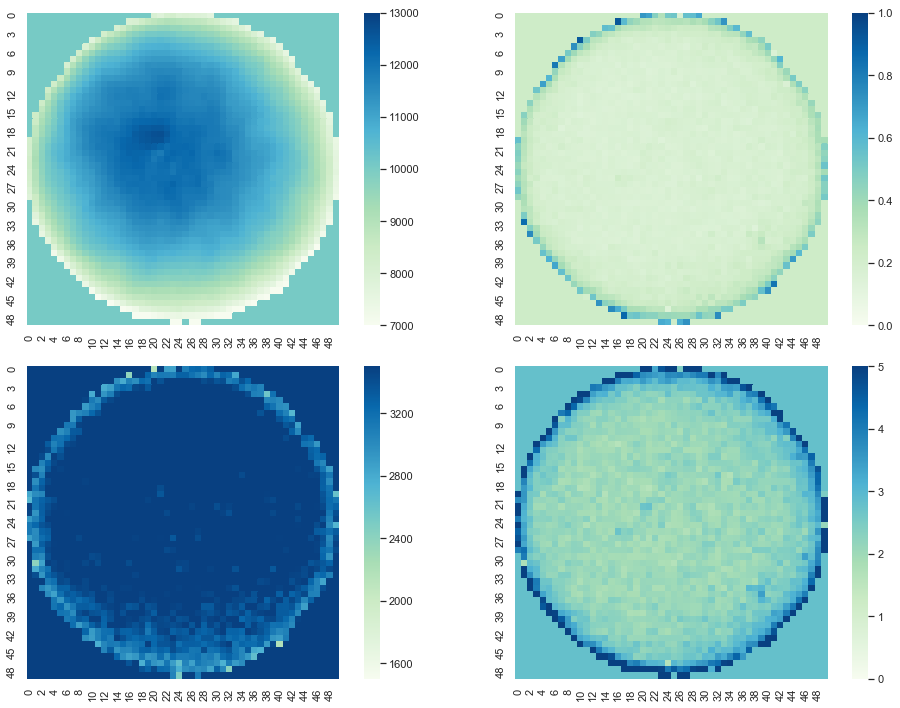

In [79]:
draw_xy_maps(asmAv,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))


### Use several time intervals

In [80]:
t0 = time.time()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fpmxy = fit_map_xy(selection_map = KRES,
                       event_map     = neM,
                       n_time_bins   = 5,
                       time_diffs    = DT,
                       nbins_z        = krNbins.Z, 
                       nbins_e        = krNbins.S2e, 
                       range_z        = z_range, 
                       range_e        = e_range,
                       energy        = 'S2e',
                       fit           = FitType.profile,
                       n_min         = 100)

t1 = time.time()
print(f' fpmxy: t = {t1 -t0}')

 fpmxy: t = 18.54988193511963


In [81]:
tsm = tsmap_from_fmap(fpmxy)

In [82]:
times = fpmxy[0][0].ts

In [83]:
times

[8698.5, 26095.5, 43492.5, 60889.5, 78286.5, 78287.5]

## Compute the average of maps

### Get all amaps (for each time interval). Maps returned are regularized and errors relative.

In [84]:
amaps = get_maps_from_tsmap(tsm, 
                            times   = times, 
                            erange  = e_range,
                            ltrange = lt_range,
                            c2range = c2_range)


In [85]:
len(amaps)

6

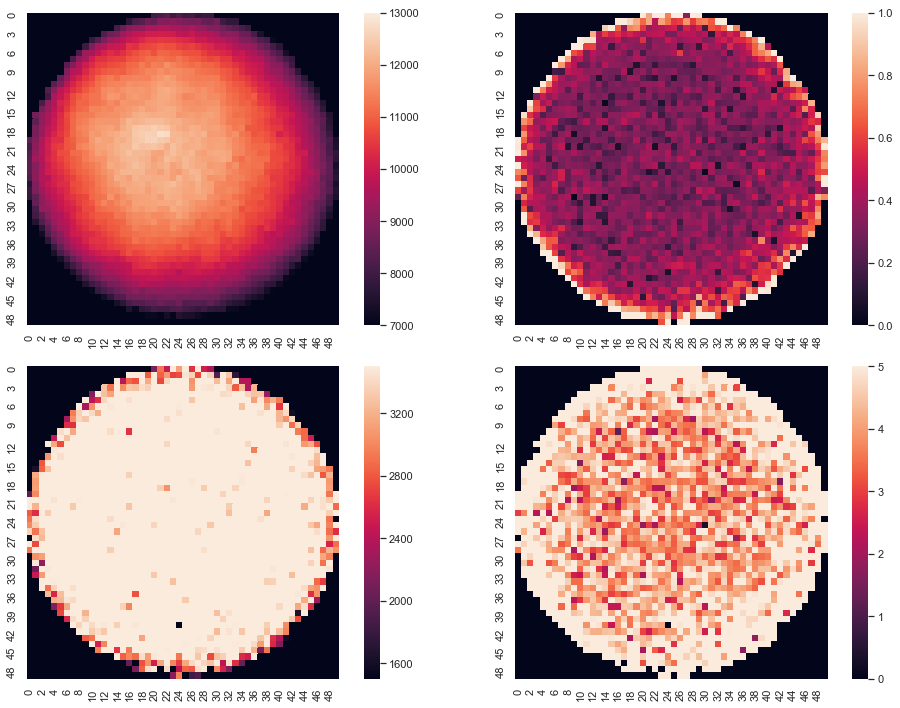

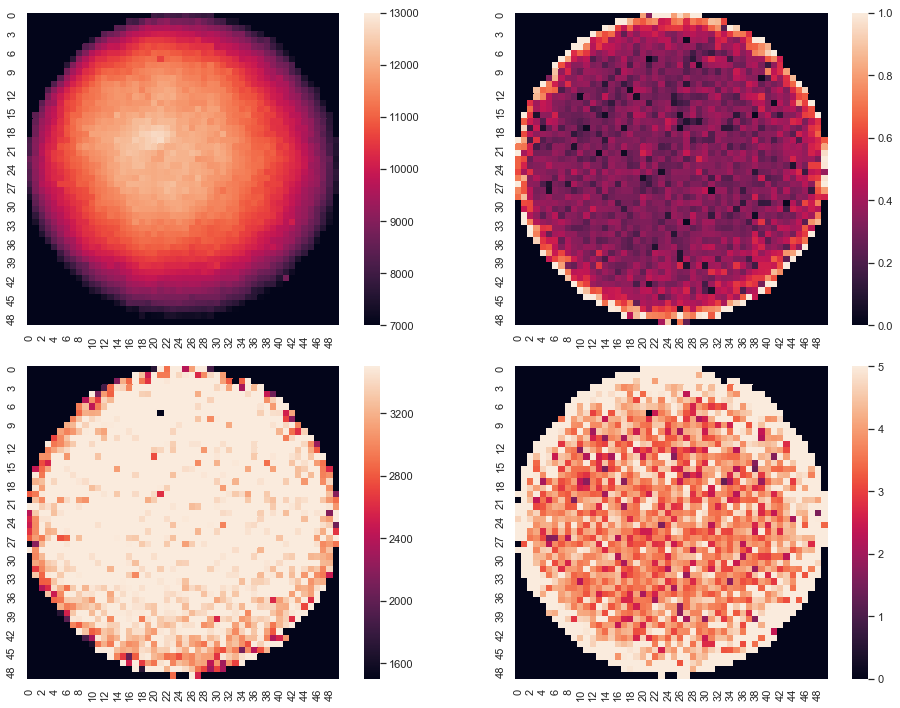

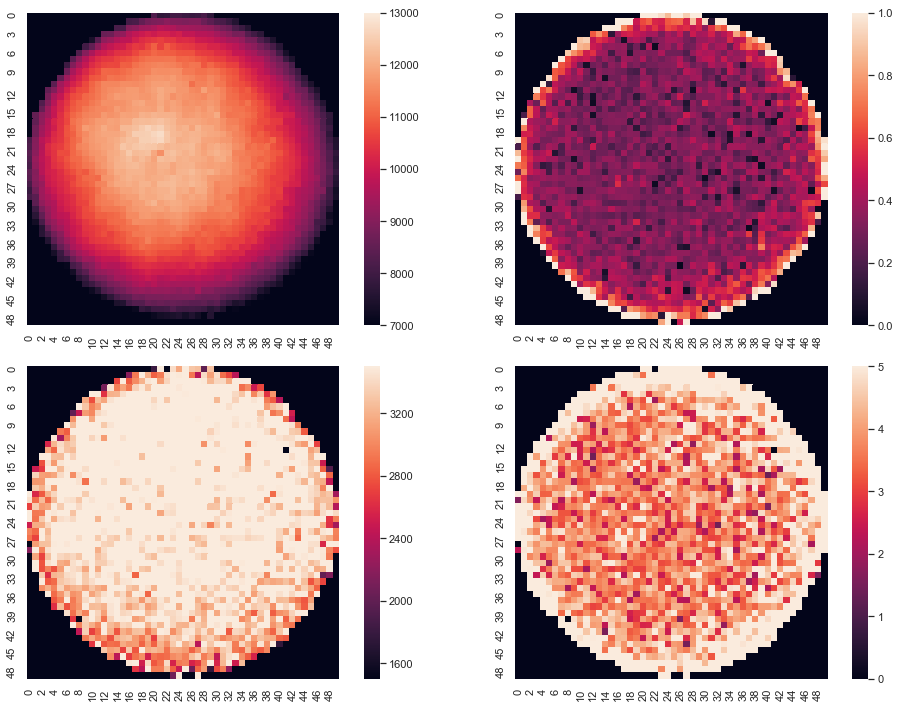

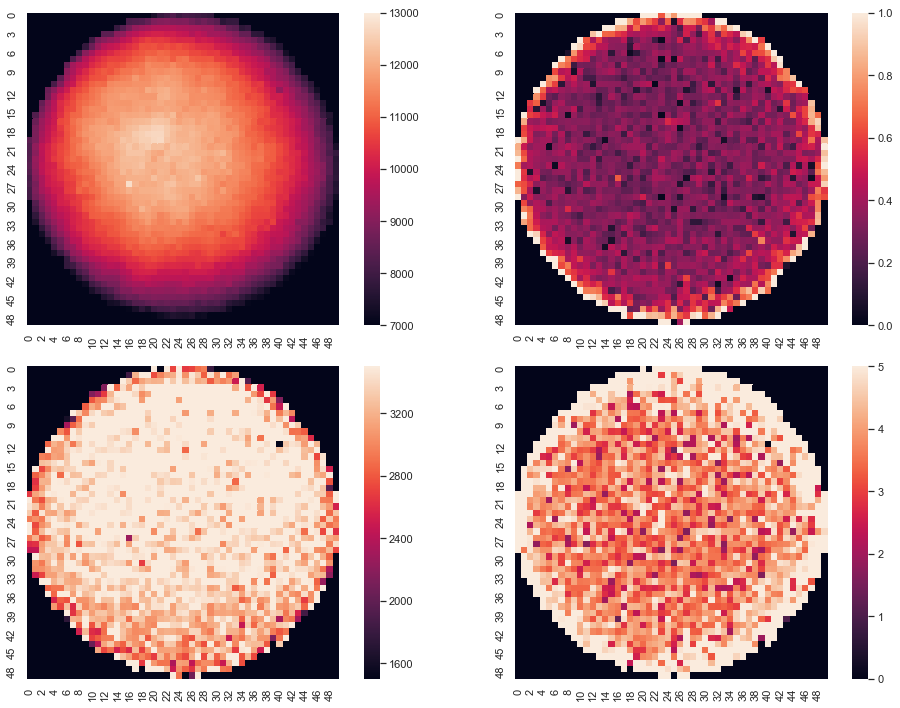

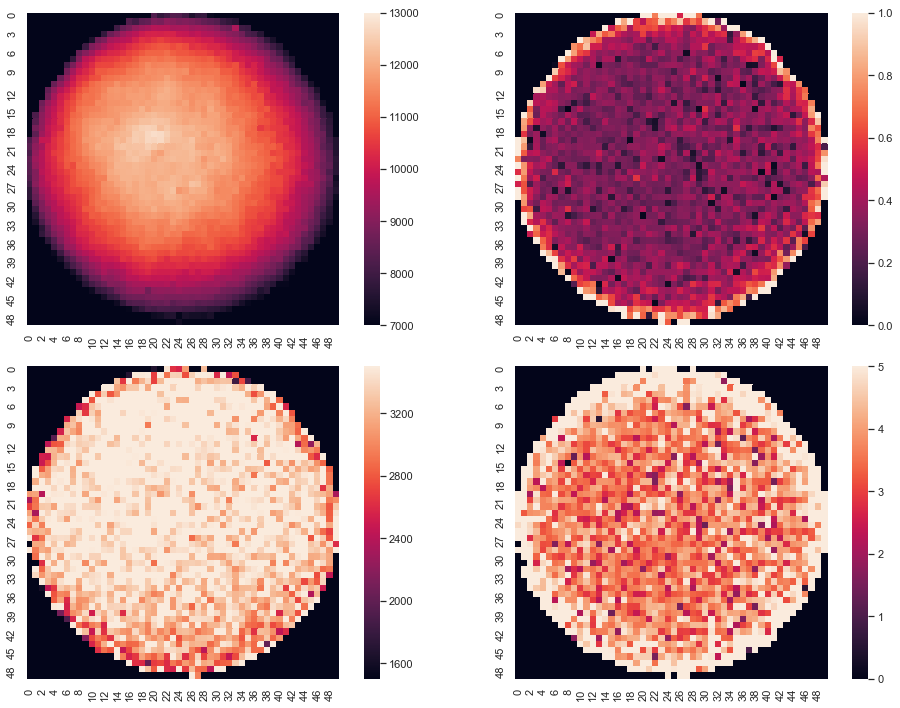

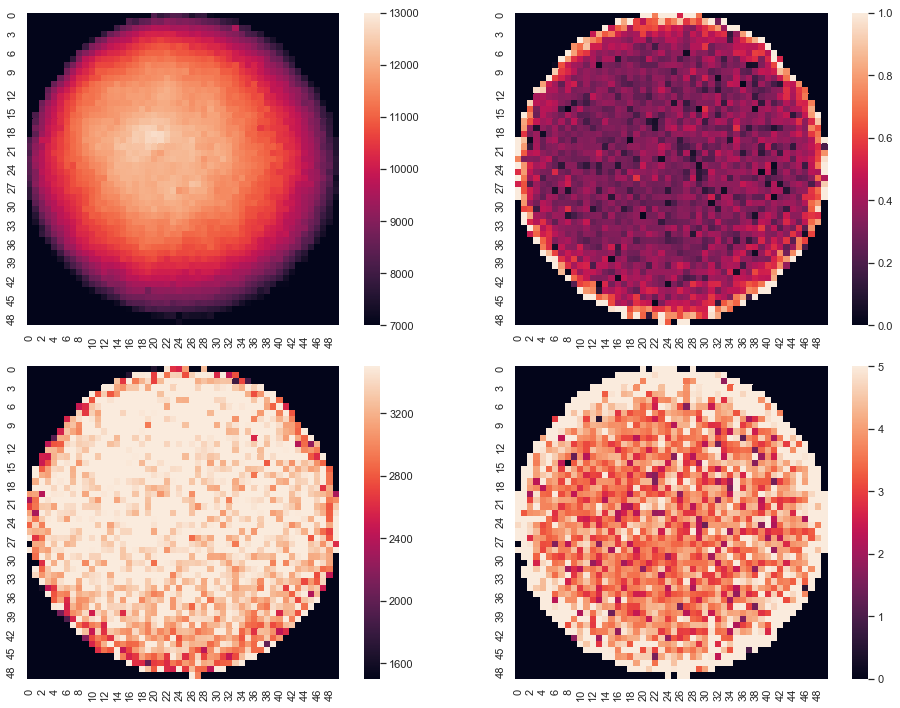

In [87]:
for amap in amaps:
    draw_xy_maps(amap,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            #cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [88]:
amAV = map_average(amaps)

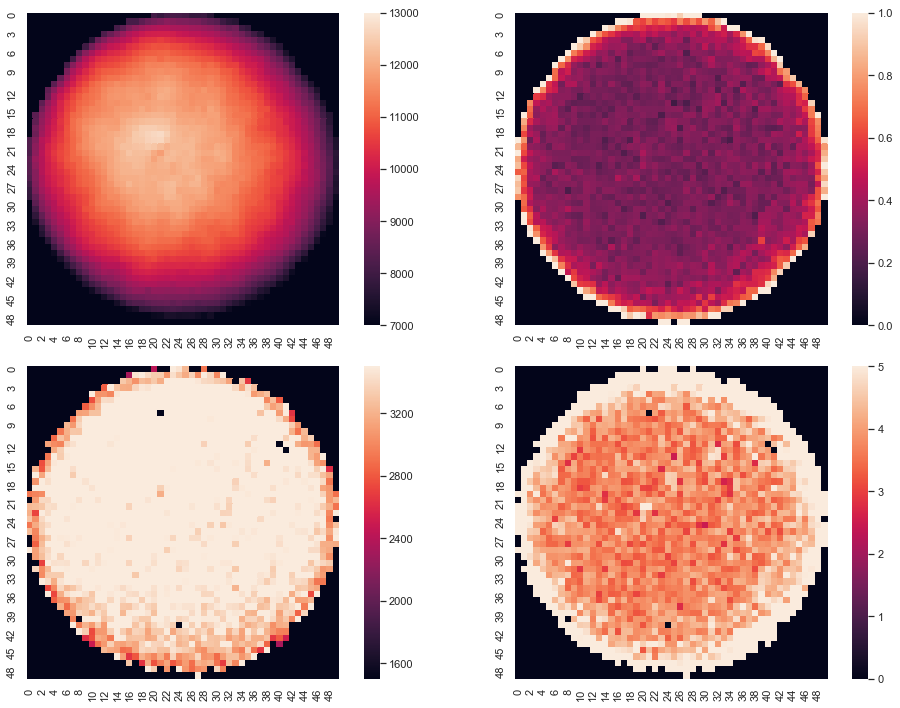

In [89]:
draw_xy_maps(amAV,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0.0,  1),
            lulims  = (0, 5),
            #cmap    = matplotlib.cm.GnBu,
            figsize=(14,10))



In [90]:
amv = amap_average(amAV) 

In [91]:
amv

ASectorMap(chi2=2.058035431848866, e0=10072.206727079645, lt=3512.9519599972514, e0u=0.4466251546394842, ltu=5.127786400630234)

### Next, NaNs are replaced by the average values of the variables (this is needed for the corrections). 

In [92]:
amAV0 = amap_replace_nan_by_mean(amAV, amMean=amv)

In [93]:
amap_average(amAV0) 

ASectorMap(chi2=1.977849290305522, e0=10259.25954005605, lt=3537.1783820882265, e0u=0.42309628713013864, ltu=4.816466107133687)

In [94]:
amap_max(amAV0)

ASectorMap(chi2=49.104866141666854, e0=12730.131163550626, lt=4644.7228632930855, e0u=2.1989002710962375, ltu=44.16807936636317)

In [95]:
amap_min(amAV0)

ASectorMap(chi2=0.6333152227898368, e0=6490.789439126528, lt=2332.1567083838895, e0u=0.16923878990917007, ltu=2.499767918862034)

In [96]:
aMaps = []
for amap in amaps:
    amv = amap_average(amap) 
    aMaps.append(amap_replace_nan_by_mean(amap, amv))


### The maps can be saved to file

In [97]:
write_maps(amAV0, filename=fn.map_file_name)

### And retrieved from file

In [98]:
amap2 = read_maps(filename=fn.map_file_name)

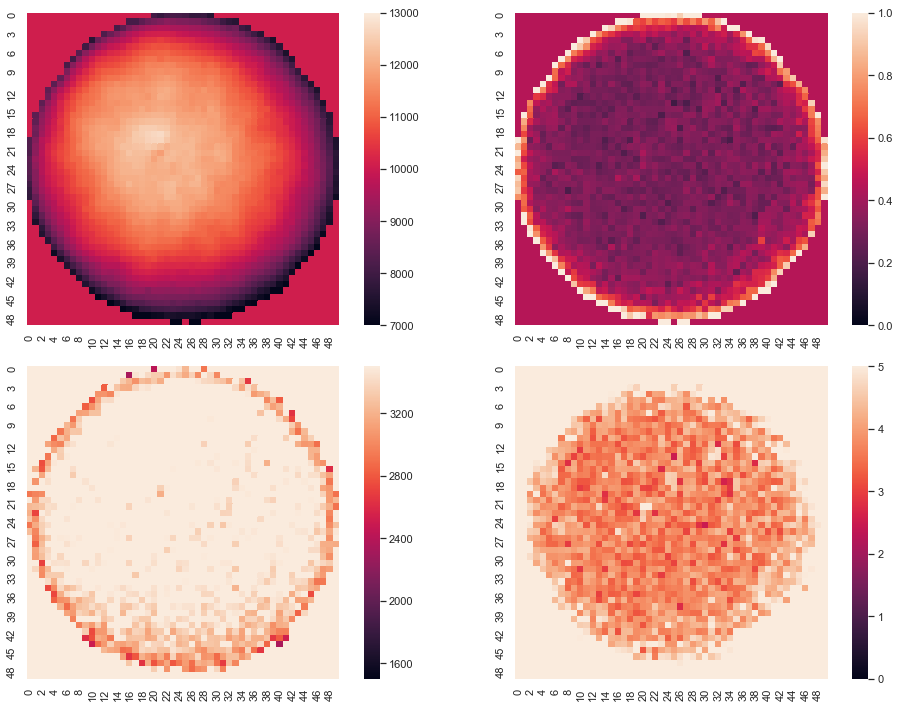

In [99]:
draw_xy_maps(amap2,
            e0lims  = (7000, 13000),
            ltlims  = (1500, 3500),
            eulims  = (0, 1),
            lulims  = (0, 5),
            figsize=(14,10))

### To write the complete time-series of maps
```
write_maps_ts(aMaps : Iterable[ASectorMap], ts: np.array, filename : str)
```

In [100]:
write_maps_ts(aMaps, times, filename=fn.map_file_name_ts)

#### They can be read back

In [101]:
ts, tsMaps = read_maps_ts(fn.map_file_name_ts)

In [102]:
ts

0     8698.5
1    26095.5
2    43492.5
3    60889.5
4    78286.5
5    78287.5
dtype: float64

### One can plot the maps selected by type:

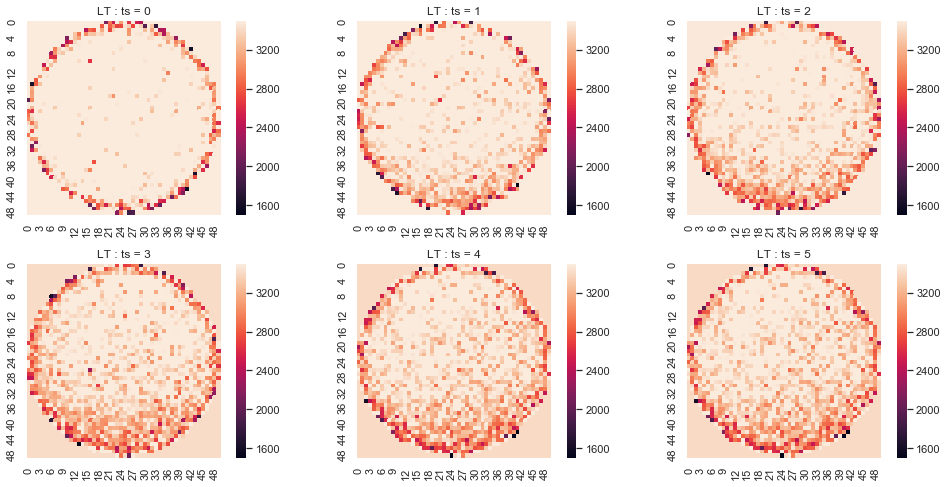

In [103]:
draw_xy_maps_ts(tsMaps,   
                wmap    = MapType.LT,
                ltlims  = (1500, 3500),
                figsize = (14,10))

### From this collection one would imagine that it is neccessary to correct using time-depende maps. 